In [2]:
!pip install pyspellchecker

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ----------------------- ---------------- 4.2/7.2 MB 25.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.2/7.2 MB 24.5 MB/s eta 0:00:01
   ------------------------------- -------- 5.8/7.2 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 10.9 MB/s eta 0:00:00


In [4]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path:", path)

Defaulting to user installation because normal site-packages is not writeable


100%|████████████████████████████████████████████████████████████████████████████████| 903k/903k [00:01<00:00, 664kB/s]

Extracting files...
Path: C:\Users\katha\.cache\kagglehub\datasets\ankurzing\sentiment-analysis-for-financial-news\versions\5


In [8]:
import os
import pandas as pd

# List contents of the downloaded directory
file_path = r'C:\Users\katha\.cache\kagglehub\datasets\ankurzing\sentiment-analysis-for-financial-news\versions\5'
print(os.listdir(file_path))

# Construct the full path to the CSV file
csv_file_path = os.path.join(file_path, 'all-data.csv')

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_file_path, encoding='latin-1', header=None)

# Display the first 5 rows of the DataFrame
display(df.head())


['all-data.csv', 'FinancialPhraseBank']


,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [9]:
df.rename(columns={0: 'Sentiment', 1: 'Text'}, inplace=True)
display(df.head())

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [10]:
X = df['Text']
y = df['Sentiment']

print("\ny head:")
display(y.head())

print("X head:")
display(X.head())



y head:


0     neutral
1     neutral
2    negative
3    positive
4    positive
Name: Sentiment, dtype: object

X head:


0    According to Gran , the company has no plans t...
1    Technopolis plans to develop in stages an area...
2    The international electronic industry company ...
3    With the new production plant the company woul...
4    According to the company 's updated strategy f...
Name: Text, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("type of X_train: {}".format( type(X_train)))
print(" length of text_train: {}".format(len( X_train)))
print("\n\n text_train[5]:\n{}".format( X_train[0:6]))
print("type of X_test: {}".format( type(X_test)))
print(" length of X_test: {}".format(len(X_test)))
print("\n\n X_test[6]:\n{}".format( X_test.iloc[6]))
print("\n\n y_test[6]:\n{}".format (y_test.iloc[6]))

Shape of X_train: (3876,)
Shape of X_test: (970,)
Shape of y_train: (3876,)
Shape of y_test: (970,)
type of X_train: <class 'pandas.core.series.Series'>
 length of text_train: 3876


 text_train[5]:
432     In Russia , Raisio 's Food Division 's home ma...
3071    Operators only need to learn how to use one de...
289     The company expects its net sales in the first...
2588    The bridge will be 1.2 km long and is located ...
4121    Nokia and Capcom announced that Resident Evil ...
4489    At the same time I am delighted by the fact th...
Name: Text, dtype: object
type of X_test: <class 'pandas.core.series.Series'>
 length of X_test: 970


 X_test[6]:
Finnish-owned contract manufacturer of electronics Elcoteq Hungary Kft has announced plans to recruit more than 650 new staffers to fulfill new orders in P+_cs , where the company has two plants .


 y_test[6]:
positive


In [12]:
import re

def clean_text(text):
    """Performs several text cleaning operations on the input string."""
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # 3. Strip HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove all non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)

    # 5. Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Test the function with a sample text
sample_text = "This is a sample text with a URL: https://example.com/page?id=123, HTML <b>tags</b>, special characters like @#$%^&*, and multiple spaces. <br /><br /> Another line!"
cleaned_sample_text = clean_text(sample_text)

print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_sample_text)

X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

print("Original X_train head (first 5 entries):")
display(X_train.head())

print("\nCleaned X_train head (first 5 entries):")
display(X_train_cleaned.head())

print("\nOriginal X_test head (first 5 entries):")
display(X_test.head())

print("\nCleaned X_test head (first 5 entries):")
display(X_test_cleaned.head())

Original Text: This is a sample text with a URL: https://example.com/page?id=123, HTML <b>tags</b>, special characters like @#$%^&*, and multiple spaces. <br /><br /> Another line!
Cleaned Text: this is a sample text with a url html tags special characters like and multiple spaces another line
Original X_train head (first 5 entries):


432     In Russia , Raisio 's Food Division 's home ma...
3071    Operators only need to learn how to use one de...
289     The company expects its net sales in the first...
2588    The bridge will be 1.2 km long and is located ...
4121    Nokia and Capcom announced that Resident Evil ...
Name: Text, dtype: object


Cleaned X_train head (first 5 entries):


432     in russia raisio s food division s home market...
3071    operators only need to learn how to use one de...
289     the company expects its net sales in the first...
2588    the bridge will be 12 km long and is located b...
4121    nokia and capcom announced that resident evil ...
Name: Text, dtype: object


Original X_test head (first 5 entries):


3207    The company was supposed to deliver machinery ...
1684    UNC Charlotte would also deploy SSH Tectia Con...
1044    In 2009 , Lee & Man had a combined annual prod...
4145    `` That 's a very high figure on the European ...
1538    In Finland , the corresponding service is Alma...
Name: Text, dtype: object


Cleaned X_test head (first 5 entries):


3207    the company was supposed to deliver machinery ...
1684    unc charlotte would also deploy ssh tectia con...
1044    in 2009 lee man had a combined annual producti...
4145    that s a very high figure on the european scal...
1538    in finland the corresponding service is alma m...
Name: Text, dtype: object

In [13]:
from spellchecker import SpellChecker

# Instantiate a SpellChecker object (language='en' by default)
spell = SpellChecker(language='en')

def correct_spellings(text):
    """Corrects spelling errors in the input text using SpellChecker."""
    # Split the text into words
    words = text.split()
    corrected_words = []
    for word in words:
        # Get the most probable correct spelling for each word
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            # If no correction is found, keep the original word
            corrected_words.append(word)

    # Join the corrected words back into a single string
    return " ".join(corrected_words)

# Test the function with a sample sentence
sample_text_with_errors = "This is a samle txt with some speling erors."
corrected_sample_text = correct_spellings(sample_text_with_errors)

print("Original Text:", sample_text_with_errors)
print("Corrected Text:", corrected_sample_text)



Original Text: This is a samle txt with some speling erors.
Corrected Text: This is a same text with some spelling errors


In [15]:
X_train_spell_corrected = X_train_cleaned.apply(correct_spellings)
X_test_spell_corrected = X_test_cleaned.apply(correct_spellings)

print("Original X_train_cleaned head (first 5 entries):")
display(X_train_cleaned.head())

print("\nSpell-corrected X_train head (first 5 entries):")
display(X_train_spell_corrected.head())

print("\nOriginal X_test_cleaned head (first 5 entries):")
display(X_test_cleaned.head())

print("\nSpell-corrected X_test head (first 5 entries):")
display(X_test_spell_corrected.head())

Original X_train_cleaned head (first 5 entries):


432     in russia raisio s food division s home market...
3071    operators only need to learn how to use one de...
289     the company expects its net sales in the first...
2588    the bridge will be 12 km long and is located b...
4121    nokia and capcom announced that resident evil ...
Name: Text, dtype: object


Spell-corrected X_train head (first 5 entries):


432     in russia raisin s food division s home market...
3071    operators only need to learn how to use one de...
289     the company expects its net sales in the first...
2588    the bridge will be 12 am long and is located b...
4121    nokia and captor announced that resident evil ...
Name: Text, dtype: object


Original X_test_cleaned head (first 5 entries):


3207    the company was supposed to deliver machinery ...
1684    unc charlotte would also deploy ssh tectia con...
1044    in 2009 lee man had a combined annual producti...
4145    that s a very high figure on the european scal...
1538    in finland the corresponding service is alma m...
Name: Text, dtype: object


Spell-corrected X_test head (first 5 entries):


3207    the company was supposed to deliver machinery ...
1684    una charlotte would also deploy ssh tactic con...
1044    in 2009 lee man had a combined annual producti...
4145    that s a very high figure on the european scal...
1538    in finland the corresponding service is alma m...
Name: Text, dtype: object

In [123]:
X_train_spell_corrected.to_excel("X_train_spell_corrected.xlsx")
X_test_spell_corrected.to_excel("X_test_spell_corrected.xlsx")

In [124]:
import string

PUNCT_TO_REMOVE = string.punctuation    #list of standard python punctuations


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))   # tranlate "" to "" and delete all punctuations


text = "yay!"
remove_punctuation(text)


#PUNCT_TO_REMOVE = string.punctuation   # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#str.maketrans('', '', PUNCT_TO_REMOVE)

'yay'

In [125]:
X_train_no_punct = X_train_spell_corrected.apply(remove_punctuation)
X_test_no_punct = X_test_spell_corrected.apply(remove_punctuation)

print("Original X_train_spell_corrected head (first 5 entries):")
display(X_train_spell_corrected.head())

print("\nProcessed X_train_no_punct head (first 5 entries):")
display(X_train_no_punct.head())

print("\nOriginal X_test_spell_corrected head (first 5 entries):")
display(X_test_spell_corrected.head())

print("\nProcessed X_test_no_punct head (first 5 entries):")
display(X_test_no_punct.head())

Original X_train_spell_corrected head (first 5 entries):


432     in russia raisin s food division s home market...
3071    operators only need to learn how to use one de...
289     the company expects its net sales in the first...
2588    the bridge will be 12 am long and is located b...
4121    nokia and captor announced that resident evil ...
Name: Text, dtype: object


Processed X_train_no_punct head (first 5 entries):


432     in russia raisin s food division s home market...
3071    operators only need to learn how to use one de...
289     the company expects its net sales in the first...
2588    the bridge will be 12 am long and is located b...
4121    nokia and captor announced that resident evil ...
Name: Text, dtype: object


Original X_test_spell_corrected head (first 5 entries):


3207    the company was supposed to deliver machinery ...
1684    una charlotte would also deploy ssh tactic con...
1044    in 2009 lee man had a combined annual producti...
4145    that s a very high figure on the european scal...
1538    in finland the corresponding service is alma m...
Name: Text, dtype: object


Processed X_test_no_punct head (first 5 entries):


3207    the company was supposed to deliver machinery ...
1684    una charlotte would also deploy ssh tactic con...
1044    in 2009 lee man had a combined annual producti...
4145    that s a very high figure on the european scal...
1538    in finland the corresponding service is alma m...
Name: Text, dtype: object

In [126]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert to set
stop_words = set(ENGLISH_STOP_WORDS)
keep_words = {'up', 'down', 'rise', 'fall', 'above', 'below', 'under', 'over', 'not', 'no', 'nor', 'neither', 'never', 'none', 'growth', 'increase', 'decrease', 'profit', 'loss'}
more_words = {'s'}
stop_words = stop_words - keep_words
stop_words.update(more_words)
def remove_stopwords(text):
    """custom function to remove the stopwords"""

    return " ".join([word for word in str(text).split() if word not in stop_words])
X_train_no_stopwords = X_train_no_punct.apply(remove_stopwords)
X_test_no_stopwords = X_test_no_punct.apply(remove_stopwords)

print("Original X_train_no_punct head (first 5 entries):")
display(X_train_no_punct.head())

print("\nProcessed X_train_no_stopwords head (first 5 entries):")
display(X_train_no_stopwords.head())

print("\nOriginal X_test_no_punct head (first 5 entries):")
display(X_test_no_punct.head())

print("\nProcessed X_test_no_stopwords head (first 5 entries):")
display(X_test_no_stopwords.head())

Original X_train_no_punct head (first 5 entries):


432     in russia raisin s food division s home market...
3071    operators only need to learn how to use one de...
289     the company expects its net sales in the first...
2588    the bridge will be 12 am long and is located b...
4121    nokia and captor announced that resident evil ...
Name: Text, dtype: object


Processed X_train_no_stopwords head (first 5 entries):


432     russia raisin food division home market stretc...
3071    operators need learn use device multiple level...
289     company expects net sales half 2008 reach prev...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Original X_test_no_punct head (first 5 entries):


3207    the company was supposed to deliver machinery ...
1684    una charlotte would also deploy ssh tactic con...
1044    in 2009 lee man had a combined annual producti...
4145    that s a very high figure on the european scal...
1538    in finland the corresponding service is alma m...
Name: Text, dtype: object


Processed X_test_no_stopwords head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma media etuov...
Name: Text, dtype: object

In [127]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [128]:
import nltk
nltk.download('wordnet')

X_train_lemmatized = X_train_no_stopwords.apply(lemmatize_words)
X_test_lemmatized = X_test_no_stopwords.apply(lemmatize_words)

print("Original X_train_no_stopwords head (first 5 entries):")
display(X_train_no_stopwords.head())

print("\nProcessed X_train_lemmatized head (first 5 entries):")
display(X_train_lemmatized.head())

print("\nOriginal X_test_no_stopwords head (first 5 entries):")
display(X_test_no_stopwords.head())

print("\nProcessed X_test_lemmatized head (first 5 entries):")
display(X_test_lemmatized.head())

Original X_train_no_stopwords head (first 5 entries):


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


432     russia raisin food division home market stretc...
3071    operators need learn use device multiple level...
289     company expects net sales half 2008 reach prev...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Processed X_train_lemmatized head (first 5 entries):


432     russia raisin food division home market stretc...
3071    operator need learn use device multiple level ...
289     company expects net sale half 2008 reach previ...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Original X_test_no_stopwords head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma media etuov...
Name: Text, dtype: object


Processed X_test_lemmatized head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma medium etuo...
Name: Text, dtype: object

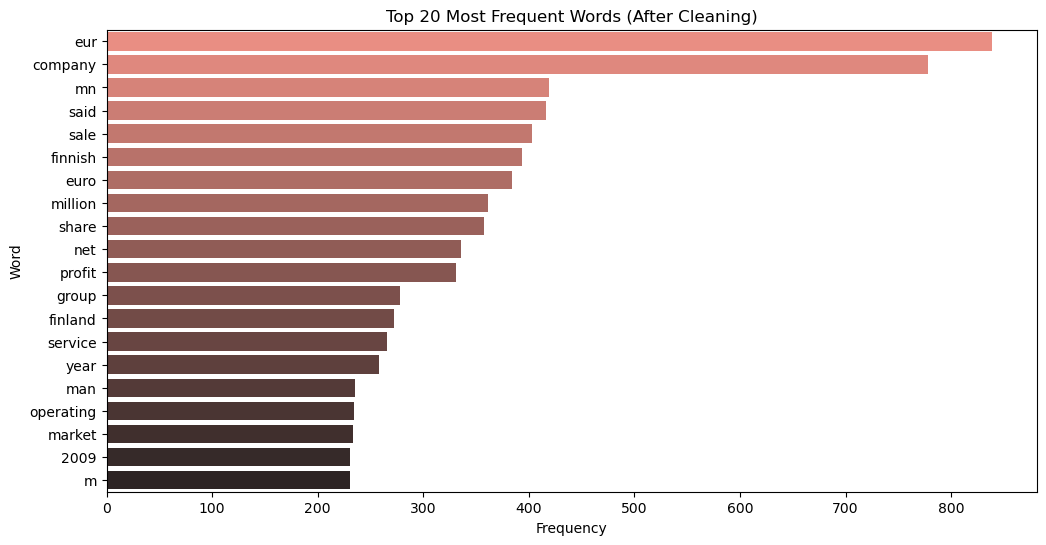

In [129]:
from collections import Counter

# Aggregate all cleaned text from training set
all_text = " ".join(X_train_lemmatized)
word_freq = Counter(all_text.split())

# Get top 20 words
common_words = word_freq.most_common(20)
words = [row[0] for row in common_words]
counts = [row[1] for row in common_words]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words, palette='dark:salmon_r', hue=words, legend=False)
plt.title('Top 20 Most Frequent Words (After Cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [130]:
!pip install demoji

import demoji

Defaulting to user installation because normal site-packages is not writeable


In [132]:
def replace_emojis_with_words(text):
    """Replaces emojis in a string with their corresponding English word descriptions."""
    return demoji.replace_with_desc(text, sep=" ")


X_train_no_emojis = X_train_lemmatized.apply(replace_emojis_with_words)
X_test_no_emojis = X_test_lemmatized.apply(replace_emojis_with_words)

print("Original X_train_lemmatized head (first 5 entries):")
display(X_train_lemmatized.head())

print("\nProcessed X_train_no_emojis head (first 5 entries):")
display(X_train_no_emojis.head())

print("\nOriginal X_test_lemmatized head (first 5 entries):")
display(X_test_lemmatized.head())

print("\nProcessed X_test_no_emojis head (first 5 entries):")
display(X_test_no_emojis.head())

Original X_train_lemmatized head (first 5 entries):


432     russia raisin food division home market stretc...
3071    operator need learn use device multiple level ...
289     company expects net sale half 2008 reach previ...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Processed X_train_no_emojis head (first 5 entries):


432     russia raisin food division home market stretc...
3071    operator need learn use device multiple level ...
289     company expects net sale half 2008 reach previ...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Original X_test_lemmatized head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma medium etuo...
Name: Text, dtype: object


Processed X_test_no_emojis head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma medium etuo...
Name: Text, dtype: object

In [133]:
# Create a Python dictionary for common acronyms and their full forms
acronyms = {"AFAIK" : "As Far As I Know",
"AFK" : "Away From Keyboard",
"ASAP" : "As Soon As Possible",
"ATK" : "At The Keyboard",
"ATM" : "At The Moment",
"A3" : "Anytime, Anywhere, Anyplace",
"BAK" : "Back At Keyboard",
"BBL" : "Be Back Later",
"BBS" : "Be Back Soon",
"BFN" : "Bye For Now",
"B4N" : "Bye For Now",
"BRB" : "Be Right Back",
"BRT" : "Be Right There",
"BTW" : "By The Way",
"B4" : "Before",
"B4N" : "Bye For Now",
"CU" : "See You",
"CUL8R" : "See You Later",
"CYA" : "See You",
"FAQ" : "Frequently Asked Questions",
"FC" : "Fingers Crossed",
"FWIW" : "For What It's Worth",
"FYI" : "For Your Information",
"GAL" : "Get A Life",
"GG" : "Good Game",
"GN" : "Good Night",
"GMTA" : "Great Minds Think Alike",
"GR8" : "Great!",
"G9" : "Genius",
"IC" : "I See",
"ICQ" : "I Seek you",
"ILU" : "I Love You",
"IMHO" : "In My Honest/Humble Opinion",
"IMO" : "In My Opinion",
"IOW" : "In Other Words",
"IRL" : "In Real Life",
"KISS" : "Keep It Simple, Stupid",
"LDR" : "Long Distance Relationship",
"LMAO" : "Laugh My A.. Off",
"LOL" : "Laughing Out Loud",
"LTNS" : "Long Time No See",
"L8R" : "Later",
"MTE" : "My Thoughts Exactly",
"M8" : "Mate",
"NRN" : "No Reply Necessary",
"OIC" : "Oh I See",
"PITA" : "Pain In The A..",
"PRT" : "Party",
"PRW" : "Parents Are Watching",
"ROFL" : "Rolling On The Floor Laughing",
"ROFLOL" : "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO" : "Rolling On The Floor Laughing My A.. Off",
"SK8" : "Skate",
"STATS" : "Your sex and age",
"ASL" : "Age, Sex, Location",
"THX" : "Thank You",
"TTFN" : "Ta-Ta For Now!",
"TTYL" : "Talk To You Later",
"U" : "You",
"U2" : "You Too",
"U4E" : "Yours For Ever",
"WB" : "Welcome Back",
"WTF" : "What The F...",
"WTG" : "Way To Go!",
"WUF" : "Where Are You From?",
"W8" : "Wait...",
"yoy": "year over year",
"mom": "month over month",
"qoq": "quarter over quarter",
"fy": "fiscal year",
"ipo": "initial public offering",
"eps": "earnings per share",
"ebitda": "earnings before interest taxes depreciation and amortization",
"roi": "return on investment",
"roce": "return on capital employed",
"usd": "us dollar",
"eur": "euro",
"mn": "million",
"bn": "billion"
}

def replace_acronyms(text):
    """Replaces common acronyms in a string with their full forms."""
    # Use a regular expression to find whole words that are acronyms
    # and replace them. re.IGNORECASE makes it case-insensitive.
    for acr, full_form in acronyms.items():
        text = re.sub(r'\b' + re.escape(acr) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text

# Test the function with a sample text
sample_text_with_acronyms = "fyi atm  btw eur mn lol"
cleaned_sample_text_acronyms = replace_acronyms(sample_text_with_acronyms)

print("Original Text:", sample_text_with_acronyms)
print("Cleaned Text:", cleaned_sample_text_acronyms)

Original Text: fyi atm  btw eur mn lol
Cleaned Text: For Your Information At The Moment  By The Way euro million Laughing Out Loud


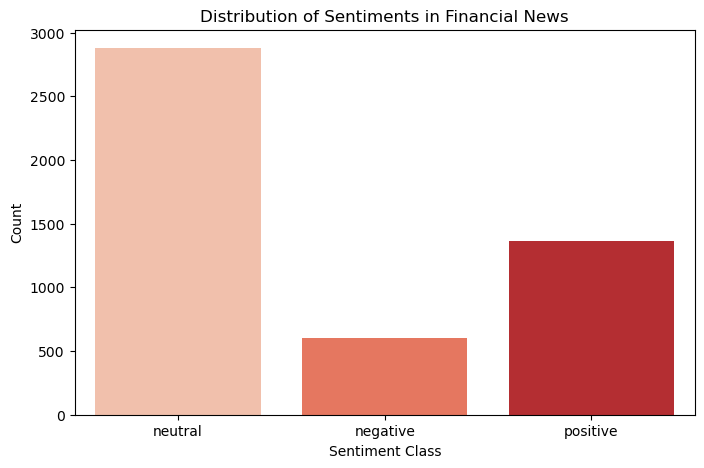

Class Counts:
 Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='Reds', hue='Sentiment', legend=False)
plt.title('Distribution of Sentiments in Financial News')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

print("Class Counts:\n", df['Sentiment'].value_counts())

In [136]:

X_train_no_acronyms = X_train_no_emojis.apply(replace_acronyms)
X_test_no_acronyms = X_test_no_emojis.apply(replace_acronyms)

print("Original X_train_no_emojis head (first 5 entries):")
display(X_train_no_emojis.head())

print("\nProcessed X_train_no_acronyms head (first 5 entries):")
display(X_train_no_acronyms.head())

print("\nOriginal X_test_no_emojis head (first 5 entries):")
display(X_test_no_emojis.head())

print("\nProcessed X_test_no_acronyms head (first 5 entries):")
display(X_test_no_acronyms.head())

Original X_train_no_emojis head (first 5 entries):


432     russia raisin food division home market stretc...
3071    operator need learn use device multiple level ...
289     company expects net sale half 2008 reach previ...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Processed X_train_no_acronyms head (first 5 entries):


432     russia raisin food division home market stretc...
3071    operator need learn use device multiple level ...
289     company expects net sale half 2008 reach previ...
2588    bridge 12 long located anasmotet road end new ...
4121    nokia captor announced resident evil degenerat...
Name: Text, dtype: object


Original X_test_no_emojis head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma medium etuo...
Name: Text, dtype: object


Processed X_test_no_acronyms head (first 5 entries):


3207    company supposed deliver machinery veneer toms...
1684    una charlotte deploy ssh tactic connector enab...
1044    2009 lee man combined annual production capaci...
4145    high figure european scale noon said recalling...
1538    finland corresponding service alma medium etuo...
Name: Text, dtype: object

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for Bag-of-Words
# We use the preprocessed text after removing acronyms
bow_vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_bow = bow_vectorizer.fit_transform(X_train_no_acronyms)

# Transform the test data using the *fitted* vectorizer
X_test_bow = bow_vectorizer.transform(X_test_no_acronyms)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Display the first few feature names to understand the vocabulary
print("\nFirst 10 features (words) from BoW vectorizer:")
display(bow_vectorizer.get_feature_names_out()[:10])


Shape of X_train_bow: (3876, 8129)
Shape of X_test_bow: (970, 8129)

First 10 features (words) from BoW vectorizer:


array(['00', '000', '000063', '0008', '001', '002', '0025', '003', '0030',
       '004'], dtype=object)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier
# Using a fixed random_state for reproducibility
rf_bow = RandomForestClassifier(random_state=42)

# Train the model using the Bag-of-Words transformed training data
print("Training Random Forest model with Bag-of-Words features...")
rf_bow.fit(X_train_bow, y_train)
print("Training complete.")

# Make predictions on the BoW transformed test data
y_pred_bow = rf_bow.predict(X_test_bow)

# Evaluate the model
print("\n--- Evaluation for Random Forest (Bag-of-Words) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bow))

Training Random Forest model with Bag-of-Words features...
Training complete.

--- Evaluation for Random Forest (Bag-of-Words) ---
Accuracy: 0.756701030927835

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.50      0.63       110
     neutral       0.74      0.95      0.83       571
    positive       0.78      0.48      0.60       289

    accuracy                           0.76       970
   macro avg       0.79      0.64      0.69       970
weighted avg       0.77      0.76      0.74       970



In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# We use the preprocessed text after removing acronyms
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  # Use both unigrams and bigrams
    min_df=5,            # Ignore terms that appear in less than 5 documents
    max_df=0.9,          # Ignore terms that appear in more than 90% of documents
    max_features=5000,   # Limit to top 5000 features
    sublinear_tf=True    # Apply sublinear scaling (1 + log(tf)) - often helps
)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_no_acronyms)

# Transform the test data using the *fitted* vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_no_acronyms)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

# Display the first few feature names to understand the vocabulary
print("\nFirst 10 features (words) from TF-IDF vectorizer:")
display(tfidf_vectorizer.get_feature_names_out()[:10])

Shape of X_train_tfidf: (3876, 2295)
Shape of X_test_tfidf: (970, 2295)

First 10 features (words) from TF-IDF vectorizer:


array(['000', '01', '02', '021', '03', '03 million', '04', '04 million',
       '05', '050'], dtype=object)

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier
# Using a fixed random_state for reproducibility
rf_tfidf = RandomForestClassifier(random_state=42)

# Train the model using the TF-IDF transformed training data
print("Training Random Forest model with TF-IDF features...")
rf_tfidf.fit(X_train_tfidf, y_train)
print("Training complete.")

# Make predictions on the TF-IDF transformed test data
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("\n--- Evaluation for Random Forest (TF-IDF) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))

Training Random Forest model with TF-IDF features...
Training complete.

--- Evaluation for Random Forest (TF-IDF) ---
Accuracy: 0.7577319587628866

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.49      0.61       110
     neutral       0.75      0.93      0.83       571
    positive       0.77      0.51      0.62       289

    accuracy                           0.76       970
   macro avg       0.78      0.65      0.69       970
weighted avg       0.76      0.76      0.74       970



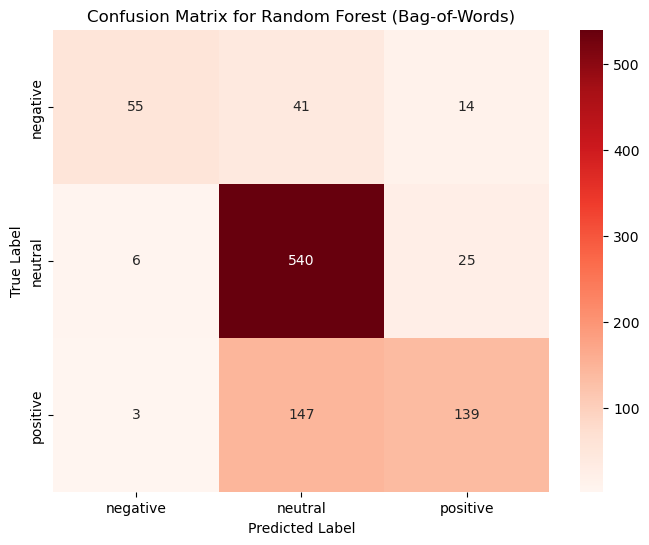

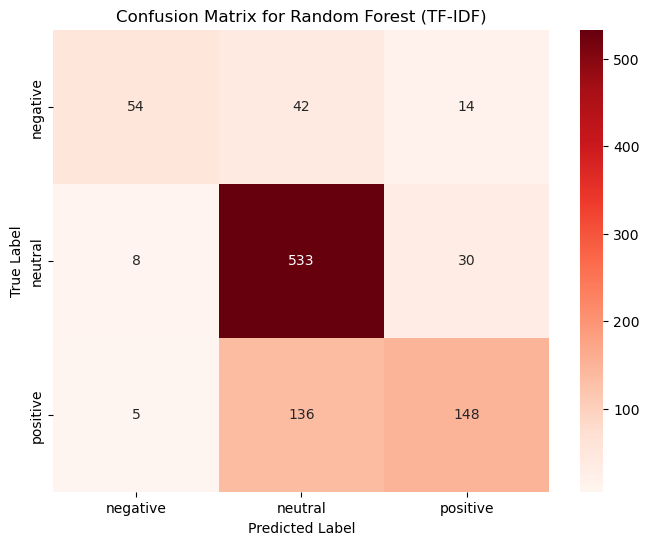

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix for Random Forest (Bag-of-Words) ---
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Reds',
            xticklabels=rf_bow.classes_, yticklabels=rf_bow.classes_)
plt.title('Confusion Matrix for Random Forest (Bag-of-Words)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Confusion Matrix for Random Forest (TF-IDF) ---
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Reds',
            xticklabels=rf_tfidf.classes_, yticklabels=rf_tfidf.classes_)
plt.title('Confusion Matrix for Random Forest (TF-IDF)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()